In [1]:
import pandas as pd

In [2]:
# 실업자수와 개인 소비 지출 간의 상간관계

In [3]:
economics = pd.read_csv('economics.csv')
economics.head()

,date,pce,pop,psavert,uempmed,unemploy
0,1967-07-01,506.7,198712.0,12.6,4.5,2944
1,1967-08-01,509.8,198911.0,12.6,4.7,2945
2,1967-09-01,515.6,199113.0,11.9,4.6,2958
3,1967-10-01,512.2,199311.0,12.9,4.9,3143
4,1967-11-01,517.4,199498.0,12.8,4.7,3066


In [4]:
#상관행렬 만들기
economics[['unemploy','pce']].corr()

,unemploy,pce
unemploy,1.000000,0.614518
pce,0.614518,1.000000


In [5]:
from scipy import stats

#상관분석
stats.pearsonr(economics['unemploy'],economics['pce'])

#첫번째가 상관계수, 두번쨰가 유의확률
#유의확률이 0.05미만이므로
#실업자 수와 개인 소비 지출의 상관관계가 통계적으로 유의하다고 판단.

(0.6145176141932082, 6.773527303291316e-61)

In [6]:
#히트맵 만들기
#여러 변수의 관련성을 한꺼번에 알아보고 싶을 때

In [7]:
mtcars = pd.read_csv('mtcars.csv')
mtcars.head()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [8]:
#상관행렬 만들기 -> corr()

car_cor = mtcars.corr()
car_cor = round(car_cor, 2) #소수점 둘째 자리까지 반올림
car_cor

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
mpg,1.00,-0.85,-0.85,-0.78,0.68,-0.87,0.42,0.66,0.60,0.48,-0.55
cyl,-0.85,1.00,0.90,0.83,-0.70,0.78,-0.59,-0.81,-0.52,-0.49,0.53
disp,-0.85,0.90,1.00,0.79,-0.71,0.89,-0.43,-0.71,-0.59,-0.56,0.39
hp,-0.78,0.83,0.79,1.00,-0.45,0.66,-0.71,-0.72,-0.24,-0.13,0.75
drat,0.68,-0.70,-0.71,-0.45,1.00,-0.71,0.09,0.44,0.71,0.70,-0.09
wt,-0.87,0.78,0.89,0.66,-0.71,1.00,-0.17,-0.55,-0.69,-0.58,0.43
qsec,0.42,-0.59,-0.43,-0.71,0.09,-0.17,1.00,0.74,-0.23,-0.21,-0.66
vs,0.66,-0.81,-0.71,-0.72,0.44,-0.55,0.74,1.00,0.17,0.21,-0.57
am,0.60,-0.52,-0.59,-0.24,0.71,-0.69,-0.23,0.17,1.00,0.79,0.06
gear,0.48,-0.49,-0.56,-0.13,0.70,-0.58,-0.21,0.21,0.79,1.00,0.27


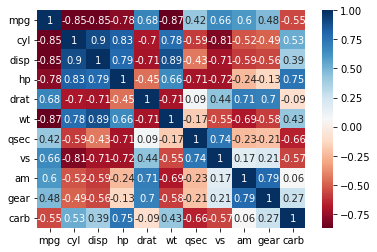

In [9]:
import seaborn as sns

#히트맵 만들기
sns.heatmap(car_cor,
           annot=True,#상관관계수 표시
           cmap='RdBu'); #컬러맵

In [10]:
#상관관계가 클 수록 상자 색깔을 진하게 표현

#상관관계가 양수면 파란색
#상관관계가 음수면 빨간색 계열로 표시

In [11]:
#대각행렬 제거
# (1) mask 만들기

import numpy as np
mask = np.zeros_like(car_cor)
mask

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [12]:
#오른쪽 위 대각 행렬을 1로 바꾸기
mask[np.triu_indices_from(mask)] = 1
mask

array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]])

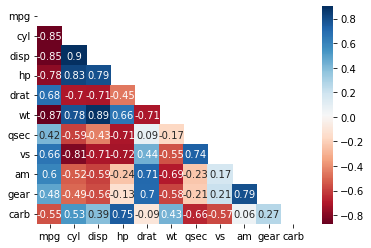

In [13]:
#히트맵에 정렬

sns.heatmap( data = car_cor,
           annot = True,
           cmap='RdBu',
           mask = mask);

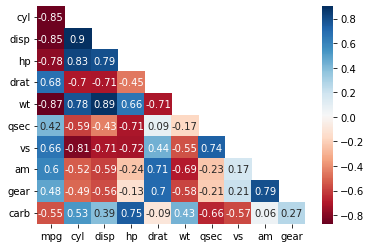

In [14]:
# 빈 행과 열 제거하기

mask_new = mask[1:,:-1]   #mask 첫 번째 행, 마지막 열 제거
cor_new = car_cor.iloc[1:,:-1]

sns.heatmap( data = cor_new,
           annot = True,
           cmap='RdBu',
           mask = mask_new);

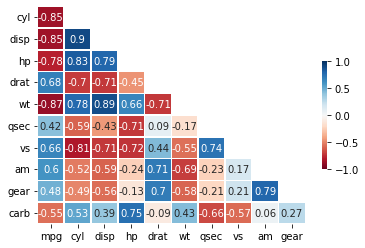

In [18]:
sns.heatmap( data = cor_new,
           annot = True,
           cmap='RdBu',
           mask = mask_new,
           linewidths = .5,  #경계 구분선 추가
           vmax=1,  #가장 진한 파란색으로 표현할 수 있는 최댓값
           vmin= -1,
           cbar_kws = {"shrink":.5});  #가장 진한 빨간색으로 표현할 수 있는 최소값
                       